# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In this exercise, we will train a model to predict price of cars (column 'selling_price'), using other features in the dataset.

In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here


In [ ]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)
print(df.isna().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### 1. Analyse your dataset. How many features and columns do we have ?

In [ ]:
df.info()
df.shape
df.describe()  # Descriptive statistics for numeric columns
df.isnull().sum()  #Checking the number of missing values in each column
df.head()  #first 5 rows of dataset.
#8218 rows and 13 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [ ]:
#Categorical variables - fuel, seller type, trasmission, owner.
#ordinal variables have a meaningful order or ranking, so we can convert them to numerical values. In our case owner and transmission are ordinal variables
#nominal have categories without an inherent order; fuel and seller type are nominal variables.

from sklearn.preprocessing import LabelEncoder #Import LabelEncoder from sklearn.preprocessing — used to encode ordinal variables.
# I didint encode 'seats' because we can think that it is ordinal but it is already in numbers so we can leave it as it is. 
label_encoders = {} #saves the encoders so that it can be decoded back
ordinal_columns = ['owner', 'transmission']#choosing order varibles in our case it is owner and transmission

for col in ordinal_columns:
    le = LabelEncoder() #object of LabelEncoder
    df[col] = le.fit_transform(df[col]) #from trxting to numerical values
    label_encoders[col] = le  # Store encoders for inverse transformation if needed
print(df[ordinal_columns    ].head())  # Check  

from sklearn.preprocessing import OneHotEncoder #It is used to encode nominal variables.

ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap
nominal_columns = ['fuel', 'seller_type'] #Selecting nominal variables

encoded_data = ohe.fit_transform(df[nominal_columns]) #Encoding nominal variables
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(nominal_columns)) #converts the array to a Data Frame so that the new columns have names.

df = df.drop(columns=nominal_columns)  # Drop original columns
df = pd.concat([df, encoded_df], axis=1)  # Add encoded features
df.head()  # Check final dataframe

   owner  transmission
0      0             1
1      2             1
2      4             1
3      0             1
4      0             1


,name,year,selling_price,km_driven,transmission,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,23.40,1248.0,74.00,5.0,1.0,0.0,0.0,1.0,0.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,2,21.14,1498.0,103.52,5.0,1.0,0.0,0.0,1.0,0.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,4,17.70,1497.0,78.00,5.0,0.0,0.0,1.0,1.0,0.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,23.00,1396.0,90.00,5.0,1.0,0.0,0.0,1.0,0.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,16.10,1298.0,88.20,5.0,0.0,0.0,1.0,1.0,0.0


### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

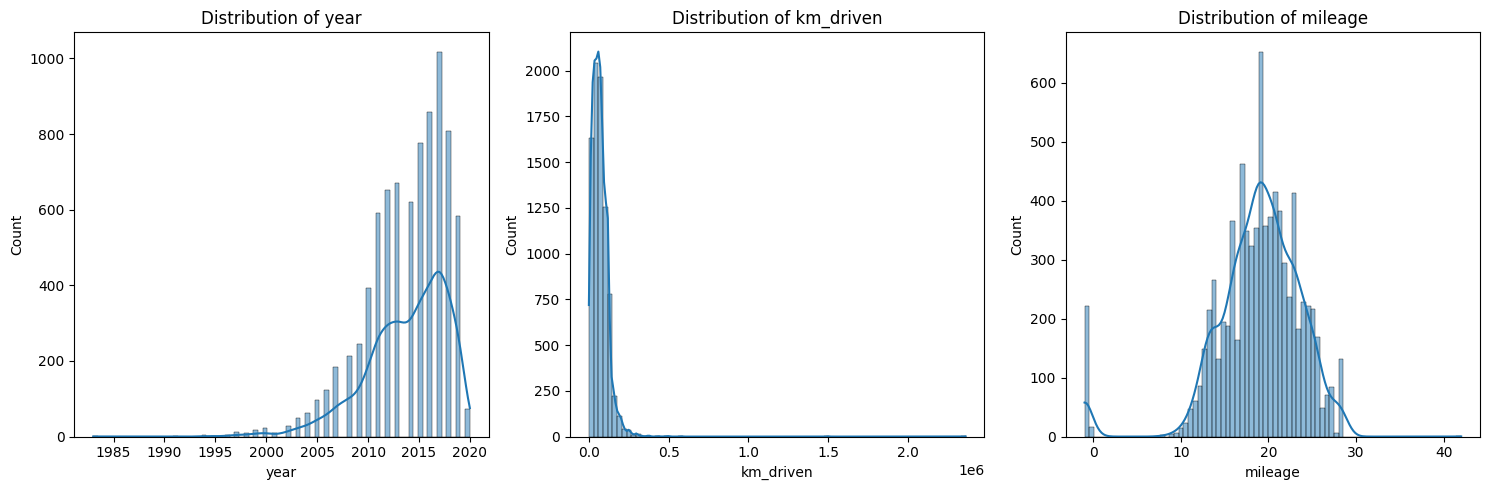

In [ ]:
import seaborn as sns  #for visualization   

df = pd.read_csv("cars.csv")
columns_to_plot = ['year', 'km_driven', "mileage"]  # Select columns for visualization

plt.figure(figsize=(15, 5)) # Set the size of the figure 15 5
for i, col in enumerate(columns_to_plot, 1): #enumerate is used to iterate over a sequence and keep track of the index of the current item.
    plt.subplot(1, 3, i)  #plots 3 graphs in 1 row (1 row, 3 columns).
    sns.histplot(df[col], bins=80, kde=True)  # Plot histogram with kernel density estimate (KDE - TRUE!!!!)
    plt.title(f"Distribution of {col}")  # Set the title of the plot

plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show() # Display the plot

#Multi—scale data:For example, year (1990-2020) and km_driven (possibly tens of thousands)-this slows down the convergence of gradient methods.
# Skewed distributions: Unbalanced data (for example, most cars with a mileage of 50-100 thousand km) complicate the training of models.
# Solution: Data normalization, logarithmization, outlier removal.

### 4. Scale those three numerical features, use whatever scaler you want (but use the SKLearn scalers)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Of all the skellers,the best is standarScaler because This method centers the data (mean = 0) and reduces it to a single variance, which improves the convergence of machine learning algorithms.
import joblib  #For saving the scaler (optional)    
#Selecting numerical features
numerical_features = ['year', 'km_driven', 'mileage']
X = df[numerical_features] #Creating a separate dataset with only numerical features

#Scaling the data
scaler = StandardScaler() 
#centers the data (mean = 0) and scales it (variance = 1), improving model convergence.
X_scaled = scaler.fit_transform(X) #applying scaling
df_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Displaying first 5 rows and checking statistics
print("Scaled data")
print(df_scaled.head())
print("\nMean values after scaling:")
print(df_scaled.mean())  # Should be close to 0
print("\nStandard deviations after scaling:")
print(df_scaled.std())  # Should be close to 1

# Saving the scaler (optional)
joblib.dump(scaler, 'standard_scaler.pkl')

Scaled data
       year  km_driven   mileage
0  0.048464   1.338363  0.890224
1  0.048464   0.887411  0.452663
2 -1.929775   1.241098 -0.213361
3 -0.940656   1.011202  0.812780
4 -1.682495   0.887411 -0.523139

Mean values after scaling:
year        -4.862252e-15
km_driven   -5.900792e-17
mileage      5.507406e-16
dtype: float64

Standard deviations after scaling:
year         1.000062
km_driven    1.000062
mileage      1.000062
dtype: float64


['standard_scaler.pkl']

### 5. Select Features and Target Variable
Separate X's to y in two different datasets

In [ ]:
#checking the distribution of the scaled data
target_column = "selling_price"  # Select the target column for visualization
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in the dataset. Check column names.")

# 2. Splitting into X (features) and y (target variable)
# if we have scaled data, we can use it
X = df_scaled 
y = df[target_column]  # Select the target variable

# if we do not have scaled data, we can use the original features
# X = df[['year', 'km_driven', 'mileage']]
# y = df[target_column]

# 3. check the dimensions of the data
print("\nData after splitting:")
print("-> Feature dimensions (X):", X.shape)
print("-> Target variable dimensions (y):", y.shape)
print("-> Sample target values (first 5 rows):")
print(y.head())



Data after splitting:
-> Feature dimensions (X): (8128, 3)
-> Target variable dimensions (y): (8128,)
-> Sample target values (first 5 rows):
0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64


### 6. Plot the distribution of the Target variable 

 You can us matplotlib or seaborn libraries


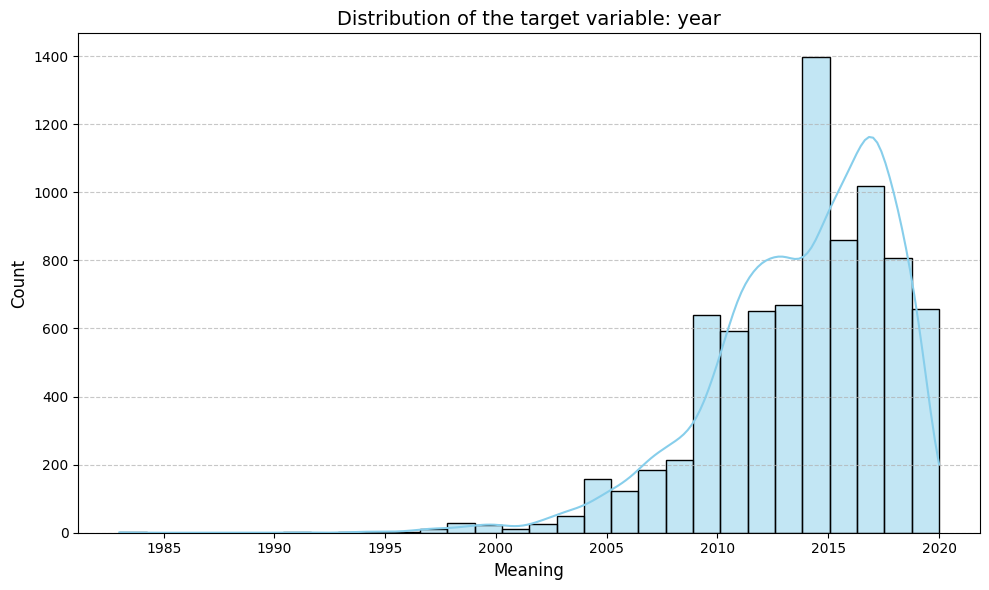

In [ ]:
#checking the distribution of the target variable as in previous step
target_column = "year"  
if target_column not in df.columns:
    raise ValueError(f"Column'{target_column}' not found.")

# graph
plt.figure(figsize=(10, 6)) # Set the size of the figure
sns.histplot(df[target_column], bins=30, kde=True, color="skyblue") # Plot histogram with kernel density estimate (KDE)

# just decoration
plt.title(f"Distribution of the target variable: {target_column}", fontsize=14)
plt.xlabel("Meaning", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7) # Add gridlines for the y-axis
#A logarithmic scale is useful when the data is highly skewed, some values are much larger than others, creating an imbalance in the visualization. becasuse of that reason we can use log scale
# logarithmic cliff (if the data is heavily skewed)
# plt.yscale("log") 

plt.tight_layout()
plt.show()

### 7. Split the Data
Use to SKLearn built-in function ```train_test_split()``` to split the dataset into training and testing sets. 

You should then have four dataset, X_train, X_test, y_train and y_test.

In [ ]:
from sklearn.model_selection import train_test_split #function for split the data into training and testing sets

# Splitting the data(80% train 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, #Target variable
    test_size=0.2,  # 20% of the data for testing
    random_state=42  # Random seed for reproducibility
)

#checking the dimensions of the data
print("Dimension of data:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimension of data:
X_train: (6502, 3)
X_test: (1626, 3)
y_train: (6502,)
y_test: (1626,)


### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [ ]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train) #fitting the model on training data

# YOUR CODE GOES HERE
# Importing the necessary library
from sklearn.ensemble import GradientBoostingRegressor #importing the model for graditn boosting 
from sklearn.metrics import mean_squared_error #importing the metric for evaluation
y_train_pred = gbr.predict(X_train) #predicting the target variable for training data
y_test_pred = gbr.predict(X_test) #predicting the target variable for testing data

# Calculating the mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Displaying the results
print(f"Train MSE (n_estimators={n}): {train_mse:.2f}")
print(f"Test MSE (n_estimators={n}): {test_mse:.2f}")

# I have a big MSE cause of prices of cars are a (selling_price) are very big. So, I can use RMSE to get a better understanding of the error.

Train MSE (n_estimators=10): 135483830681.52
Test MSE (n_estimators=10): 175375635794.20


### 9 : Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

n_estimators=10: Train MSE=135483830681.52, Test MSE=175375635794.20
n_estimators=510: Train MSE=8978200484.18, Test MSE=88272209178.79
n_estimators=1010: Train MSE=4916628835.75, Test MSE=89110194585.27
n_estimators=1510: Train MSE=3781706672.00, Test MSE=89748815656.47
n_estimators=2010: Train MSE=3179653258.58, Test MSE=90129000726.59
n_estimators=2510: Train MSE=2819717252.41, Test MSE=90220912575.07
n_estimators=3010: Train MSE=2567951425.23, Test MSE=90886176945.78
n_estimators=3510: Train MSE=2377920413.98, Test MSE=90603994931.00
n_estimators=4010: Train MSE=2242012402.87, Test MSE=90500261002.27
n_estimators=4510: Train MSE=2119946524.28, Test MSE=90614058554.70


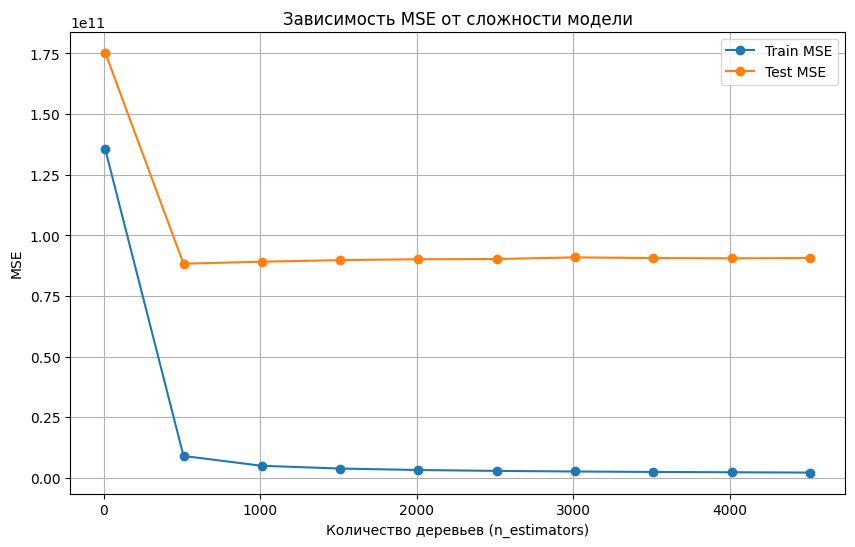

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the range of n_estimators
n_estimators_range = np.arange(10, 5001, 500)  # From 10 to 5000 with a step of 500
 # List to store the training MSE
train_mse_list = []
test_mse_list = [] 
# Loop over the range of n_estimators
for n in n_estimators_range:
    #creating the model
    gbr = GradientBoostingRegressor(
        n_estimators=n, 
        learning_rate=0.9, 
        random_state=42
    )
    
    #fitting the model
    gbr.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = gbr.predict(X_train) #predicting the target variable for training data
    y_test_pred = gbr.predict(X_test)
    
    # Calculating the mean squared error
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Storing the results
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    print(f"n_estimators={n}: Train MSE={train_mse:.2f}, Test MSE={test_mse:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_mse_list, label="Train MSE", marker="o")
plt.plot(n_estimators_range, test_mse_list, label="Test MSE", marker="o")
plt.xlabel("Number of tree(n_estimators)")
plt.ylabel("MSE")
plt.title("Dependence of MSE on the complexity of the model")
plt.legend()
plt.grid(True)
plt.show()

### 10 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

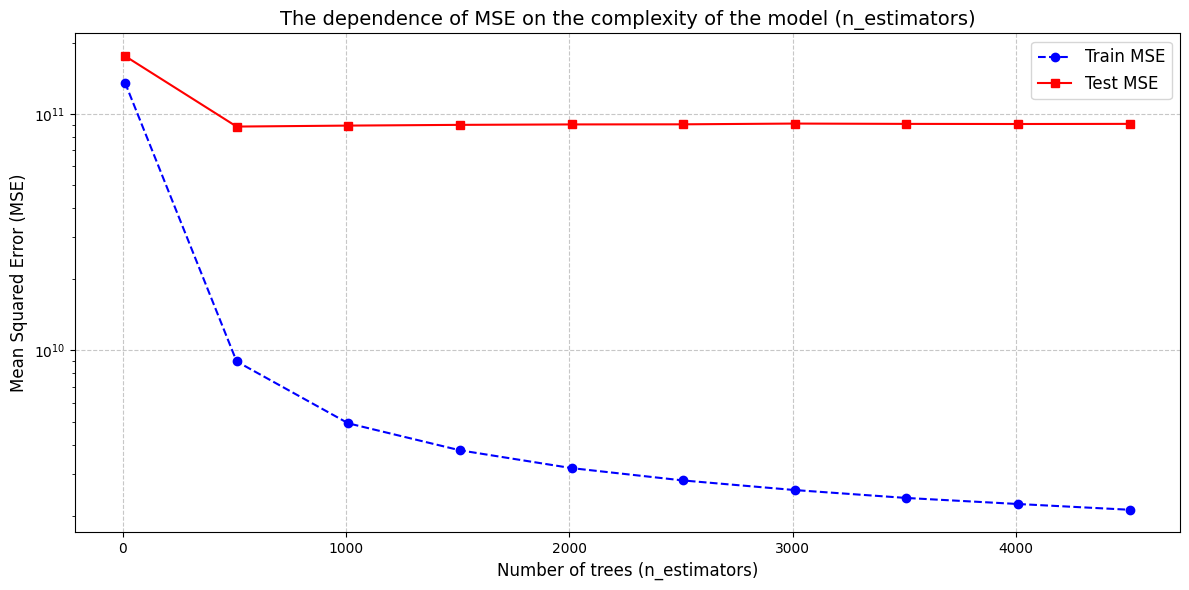

In [ ]:
plt.figure(figsize=(12, 6)) # Set the size of the figure
plt.plot(n_estimators_range, train_mse_list, label="Train MSE", marker="o", linestyle="--", color="blue")
plt.plot(n_estimators_range, test_mse_list, label="Test MSE", marker="s", linestyle="-", color="red")

plt.title("The dependence of MSE on the complexity of the model (n_estimators)", fontsize=14)
plt.xlabel("Number of trees (n_estimators)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.yscale("log") # Logarithmic scale for the y-axis
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

### 11 : What can you observe ?

Throughout the experiment, we can see that as the number of estimators (n_estimators) increases, the training error (MSE) consistently decreases, which is expected as the model gets more opportunities to fit the data. However, the test error follows a different pattern—it decreases up to a certain point and then starts to increase again.This behavior suggests overfitting: with a small number of estimators, the model is too simple and underfits the data. But with too many estimators, the model learns not only the general trends but also noise in the training set, leading to poor generalization on unseen data. Another key observation is that the gap between train MSE and test MSE widens as n_estimators increases. This confirms that while the model becomes more accurate on training data, it struggles to maintain performance on the test set.Additionally, the initial decrease in test MSE shows that boosting effectively reduces bias, but after a certain threshold, variance dominates, making the model too sensitive to minor variations.
In summary finding the optimal n_estimators is crucial—a balance must be maintained between underfitting and overfitting


### 12 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

we can Tune learning_rate alongside n_estimators
Instead of keeping learning_rate=0.9, we could test different values (e.g., 0.1, 0.05).
Lower learning rates typically require more trees but generalize better.
Adjust learning_rate for better generalization.
Use early stopping to avoid excessive boosting.
Select the most important features instead of using everything.
Regularize using min_samples_split and min_samples_leaf.
Automate parameter tuning using GridSearchCV.